## SurfinPy

#### Tutorial 2 - Introducing temperature dependence

In tutorial 1 we generated a phase diagram at 0K. However this is not representative of normal conditions. Temperature is an important consideration for materials chemists and we may wish to evaluate the state of a solid electrolyte at the operating temperature or synthesis conditions. In order to overcome this and introduce temperature we need to modify the equation for our surface energy in tutorial 1. 

\begin{align}
\gamma_{Surf} & = \frac{1}{2S} \Bigg( E_{MO}^{slab} - \frac{N_M}{x} E_{MO}^{Bulk} \Bigg) - \Delta \Gamma_O \mu_O - \Delta \Gamma_{H_2O} \mu_{H_2O} - \Delta n_O \mu_O (T) - \Delta n_{H_2O} \mu_{H_2O} (T) 
\end{align}

where $\mu$ is now a temperature dependent term and is evaluated by combining DFT data with experimental data tabulated within the NIST-JANAF database and can be defined as

\begin{align}
\mu_O (T) &  = \frac{1}{2} \mu_O (T) (0 K , DFT) +  \frac{1}{2} \mu_O (T) (0 K , EXP) +  \frac{1}{2} \Delta G_{O_2} ( \Delta T, Exp)
\end{align}

where $\mu_O$ (T) (0 K , DFT) is the 0K free energy of an isolated oxygen moleculeevaluated with DFT, $\mu_O$ (T) (0 K , EXP) is the 0 K experimental  Gibbs energy for oxygen gas and $\Delta$ $G_{O_2}$ ( $\Delta$ T, Exp) is the Gibbs energy defined at temperature T as

\begin{align}
\Delta G_{O_2} ( \Delta T, Exp) &  = \frac{1}{2} [H(T, {O_2}) -  H(0 K, {O_2})] -  \frac{1}{2} T[S(T, {O_2}])
\end{align}

In [1]:
import sys 
#from surfinpy import mu_vs_mu

import sys

sys.path.append('../surfinpy/')
import utils as ut
import mu_vs_mu

In order to calculate our $\Delta$ $G_{O_2}$ ( $\Delta$ T, Exp) values we need to use experimental data from the NIST-JANAF database. As a user you need to download the tables for the species you are interested in ( In our case oxygen and water). Surfinpy has a function that can read this data, assuming it is in the correct format. 

In [2]:
Oxygen = ut.read_nist("O2.txt")
Water = ut.read_nist("H2O.txt")

Once we have the data we can calculate $\Delta$ $G_{O_2}$ ( $\Delta$ T, Exp) using the calculate_Gibbs function.

In [3]:
Oxygen_tcd = ut.calculate_gibbs(Oxygen)
Water_tcd = ut.calculate_gibbs(Water)

Now we can calculate $\mu_O$ (T) using $\Delta$ $G_{O_2}$ ( $\Delta$ T, Exp), our DFT 0 K energy (water = -14.27662859 and oxygen = -9.08) and the 0 K exp energy ( water = 0.558478411 and oxygen = 0.86).

In [4]:
O_DFT = -9.08 + -0.86
Water_DFT = -14.835107 + 0.55

Oxygen_tcd['Shift'] = (O_DFT + Oxygen_tcd['Shift']) / 2
Water_tcd['Shift'] = (Water_DFT + Water_tcd['Shift'])

We want to know what our $\mu_O$ (T) is at 298.15 K so we need to extract it from our data 

In [5]:
for i in range(0, Oxygen_tcd['Shift'].size):
    if Oxygen_tcd['Temperature'][i] == 298.15:
        Oxygen_shift = (Oxygen_tcd['Shift'][i])
        
for i in range(0, Water_tcd['Shift'].size):
    if Oxygen_tcd['Temperature'][i] == 298.15:
        Water_shift = (Water_tcd['Shift'][i])       

Now we can generate our temperature adjusted phase diagram

In [6]:
bulk = {'M' : 1, 'O' : 2, 'Energy' : -781.954938, 'F-Units' : 32}

pure =     {'M': 24, 'X': 48, 'Y': 0, 'Area': 60.22, 'Energy': -575.570172,   'Label': 'Stoich'}
H2O =      {'M': 24, 'X': 48, 'Y': 2, 'Area': 60.22, 'Energy': -607.023918,   'Label': '1 Water'}
H2O_2 =    {'M': 24, 'X': 48, 'Y': 4, 'Area': 60.22, 'Energy': -639.246207,   'Label': '2 Water'}
H2O_3 =    {'M': 24, 'X': 48, 'Y': 8, 'Area': 60.22, 'Energy': -696.257891,   'Label': '3 Water'}

Vo =       {'M': 24, 'X': 46, 'Y': 0, 'Area': 60.22, 'Energy': -559.446890,   'Label': 'M'}
H2O_Vo =   {'M': 24, 'X': 46, 'Y': 2, 'Area': 60.22, 'Energy': -593.5710300,  'Label': 'Vo + 1 Water'}
H2O_Vo_2 = {'M': 24, 'X': 46, 'Y': 4, 'Area': 60.22, 'Energy': -624.5395200,  'Label': 'Vo + 2 Water'}
H2O_Vo_3 = {'M': 24, 'X': 46, 'Y': 6, 'Area': 60.22, 'Energy': -655.31882000, 'Label': 'Vo + 3 Water'}
H2O_Vo_4 = {'M': 24, 'X': 46, 'Y': 8, 'Area': 60.22, 'Energy': -683.71649000, 'Label': 'Vo + 4 Water'}

data = [pure, H2O_2, H2O_Vo, H2O,  H2O_Vo_2, H2O_3, H2O_Vo_3,  H2O_Vo_4, Vo]

In [7]:
deltaX = {'Range': [ -10, -4],  'Label': 'O'}
deltaY = {'Range': [ -19, -12], 'Label': 'H_2O'}
print(Oxygen_shift)

-5.015368793792


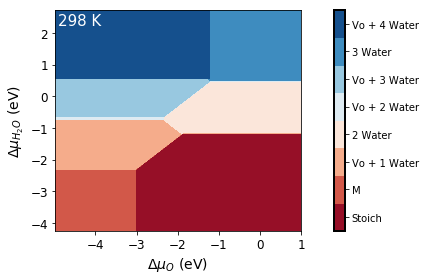

In [8]:
surface_energies,X, Y  = mu_vs_mu.calculate(data, bulk, deltaX, deltaY, xshiftval=Oxygen_shift, yshiftval=-14.75, temperature=298)

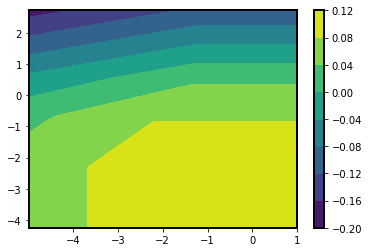

In [9]:
import matplotlib.pyplot as plt
import numpy as np
Z = np.reshape(surface_energies, (Y.size, X.size))

fig = plt.figure()
ax = fig.add_subplot(111)
CM = ax.contourf(X,Y, Z)
cbar = fig.colorbar(CM)
plt.show()